In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data.metrics import get_metrics

In [3]:
df = pd.read_json("../reports/emb_prio_new.jsonl", lines=True, orient="records")


In [16]:
df_weighted = df[df["embedding_type"] == "lookup_weighted_concat"]
df_unweighted = df[df["embedding_type"] == "lookup_concat"]

weight_means = []
weight_stds = []
norm_means_w = []
norm_stds_w = []
eff_weight_means = []
eff_weight_stds = []

for i in range(4):
    weights = np.stack(df_weighted[f"embedding_weight_{i}"])
    weight_means.append(np.mean(weights, axis=0))
    weight_stds.append(np.std(weights, axis=0))

    norms = np.stack(df_weighted[f"embedding_norm_{i}"])
    norm_means_w.append(np.mean(norms, axis=0))
    norm_stds_w.append(np.std(norms, axis=0))

    eff_weights = weights * norms
    eff_weight_means.append(np.mean(eff_weights, axis=0))
    eff_weight_stds.append(np.std(eff_weights, axis=0))

norm_means_u = []
norm_stds_u = []
for i in range(4):
    norms = np.stack(df_unweighted[f"embedding_norm_{i}"])
    norm_means_u.append(np.mean(norms, axis=0))
    norm_stds_u.append(np.std(norms, axis=0))


In [34]:
from numpy.lib.stride_tricks import sliding_window_view
eff_weight_sliding_means = []
window_size = 400
for i in range(4):
    eff_weight_mean_windows = sliding_window_view(eff_weight_means[i], (window_size,), axis=0)
    eff_weight_sliding_means.append(np.mean(eff_weight_mean_windows, axis=1))

norm_sliding_means = []
for i in range(4):
    norm_mean_windows = sliding_window_view(norm_means_w[i], (window_size,), axis=0)
    norm_sliding_means.append(np.mean(norm_mean_windows, axis=1))

Text(0, 0.5, 'Weight')

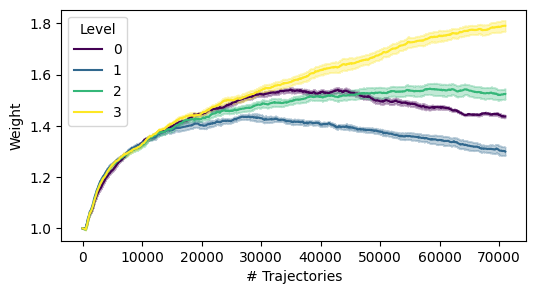

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
cmap = plt.get_cmap("viridis", 4)
colors = cmap(range(4))
for i in range(4):
    ax.plot(weight_means[i], label=i, color=colors[i])
    ax.fill_between(
        range(len(weight_means[i])),
        weight_means[i] - weight_stds[i],
        weight_means[i] + weight_stds[i],
        alpha=0.3,
        color=colors[i],
    )
ax.legend(title="Level")
ax.set_xlabel("# Trajectories")
ax.set_ylabel("Weight")

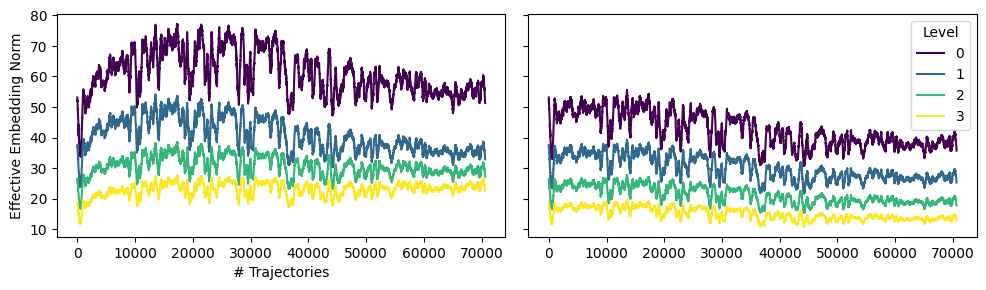

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
cmap = plt.get_cmap("viridis", 4)
colors = cmap(range(4))
for i in range(4):
    axs[0].plot(eff_weight_sliding_means[i], label=i, color=colors[i])
    # ax.fill_between(
    #     range(len(eff_weight_means[i])),
    #     eff_weight_means[i] - weight_stds[i],
    #     eff_weight_means[i] + weight_stds[i],
    #     alpha=0.3,
    #     color=colors[i],
    # )
for i in range(4):
    axs[1].plot(norm_sliding_means[i], label=i, color=colors[i])
    # ax.fill_between(
    #     range(len(eff_weight_means[i])),
    #     eff_weight_means[i] - weight_stds[i],
    #     eff_weight_means[i] + weight_stds[i],
    #     alpha=0.3,
    #     color=colors[i],
    # )
axs[1].legend(title="Level")
axs[0].set_xlabel("# Trajectories")
axs[0].set_ylabel("Effective Embedding Norm")
fig.tight_layout()

Text(0, 0.5, 'Effective Embedding Norm')

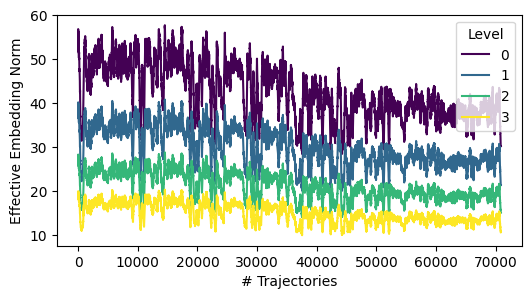

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
cmap = plt.get_cmap("viridis", 4)
colors = cmap(range(4))
for i in range(4):
    ax.plot(norm_sliding_means[i], label=i, color=colors[i])
    # ax.fill_between(
    #     range(len(eff_weight_means[i])),
    #     eff_weight_means[i] - weight_stds[i],
    #     eff_weight_means[i] + weight_stds[i],
    #     alpha=0.3,
    #     color=colors[i],
    # )
ax.legend(title="Level")
ax.set_xlabel("# Trajectories")
ax.set_ylabel("Effective Embedding Norm")

In [3]:
weights = np.concatenate([df[f'embedding_weight_{i}'].values for i in range(4)])
weights.shape

(20,)